<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/used_car_sales_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
carsales=pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/used_car_sales.csv")
zip_codes=pd.read_csv('https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/ZIP-COUNTY-FIPS_2017-06.csv')

In [47]:
carsales.shape

(122144, 13)

In [48]:
zip_codes.shape

(52889, 5)

In [49]:
carsales.head(20)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD
5,132695,950,2020,462**,71300,Mercury,Montclair,1965,NaN,NO ENGINE,Sedan,0,RWD
6,132829,950,2020,105**,71300,Mercury,Montclair,1965,NaN,NaN,Sedan,0,NaN
7,5250,70000,2019,07627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD
8,29023,1330,2019,07043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD
9,80293,25200,2019,33759,15000,Pontiac,GTO,1970,NaN,NaN,NaN,0,NaN


In [50]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
dtypes: int64(6), object(7)
memory usage: 12.1+ MB


In [51]:
zip_codes.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


Below is making a zip codes data frame which only contains zip and states.

In [52]:
zip_codes_clean = zip_codes.groupby(by=['ZIP','STATE'], as_index=False).first()[['ZIP','STATE']]


Change the Zipcodes Data Type to Integer

In [53]:
carsales = carsales[carsales['zipcode'].str.isdigit() == True]
carsales['zipcode'] = carsales['zipcode'].astype(int)


In [54]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82495 entries, 1 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            82495 non-null  int64 
 1   pricesold     82495 non-null  int64 
 2   yearsold      82495 non-null  int64 
 3   zipcode       82495 non-null  int64 
 4   Mileage       82495 non-null  int64 
 5   Make          82495 non-null  object
 6   Model         82128 non-null  object
 7   Year          82495 non-null  int64 
 8   Trim          51078 non-null  object
 9   Engine        66002 non-null  object
 10  BodyType      67562 non-null  object
 11  NumCylinders  82495 non-null  int64 
 12  DriveType     66143 non-null  object
dtypes: int64(7), object(6)
memory usage: 8.8+ MB


In [55]:
carsales = pd.merge(carsales, zip_codes_clean, left_on='zipcode', right_on='ZIP', how='left')
carsales.drop('ZIP',axis=1,inplace=True)

In [56]:
carsales.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,STATE
0,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,CO
1,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,FL
2,80773,11600,2019,7852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,NJ
3,64287,44000,2019,7728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,NJ
4,5250,70000,2019,7627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD,NJ


**Data Preprocessing**

In [57]:
carsales=carsales.drop_duplicates()

In [58]:
carsales.shape

(82495, 14)

In [59]:
carsales.dtypes

ID               int64
pricesold        int64
yearsold         int64
zipcode          int64
Mileage          int64
Make            object
Model           object
Year             int64
Trim            object
Engine          object
BodyType        object
NumCylinders     int64
DriveType       object
STATE           object
dtype: object

In [60]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82495 entries, 0 to 82494
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            82495 non-null  int64 
 1   pricesold     82495 non-null  int64 
 2   yearsold      82495 non-null  int64 
 3   zipcode       82495 non-null  int64 
 4   Mileage       82495 non-null  int64 
 5   Make          82495 non-null  object
 6   Model         82128 non-null  object
 7   Year          82495 non-null  int64 
 8   Trim          51078 non-null  object
 9   Engine        66002 non-null  object
 10  BodyType      67562 non-null  object
 11  NumCylinders  82495 non-null  int64 
 12  DriveType     66143 non-null  object
 13  STATE         82388 non-null  object
dtypes: int64(7), object(7)
memory usage: 9.4+ MB


In [61]:
carsales.isnull().sum()

ID                  0
pricesold           0
yearsold            0
zipcode             0
Mileage             0
Make                0
Model             367
Year                0
Trim            31417
Engine          16493
BodyType        14933
NumCylinders        0
DriveType       16352
STATE             107
dtype: int64

See the Cars Selling Price By Mileage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


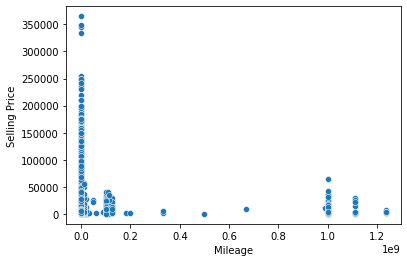

In [62]:
g = sns.scatterplot(carsales['Mileage'],carsales['pricesold'])
g.set(xlabel='Mileage', ylabel='Selling Price')
plt.show()

I will only show the cars with more than 400k mileage and none of them in zero mileage

In [64]:
carsales = carsales[(carsales['Mileage']<400000) & (carsales['Mileage']>0)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


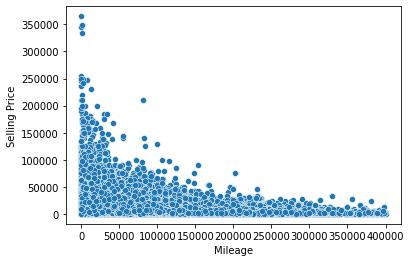

In [66]:
g = sns.scatterplot(carsales['Mileage'],carsales['pricesold'])
g.set(xlabel='Mileage', ylabel='Selling Price')
plt.show()

**Map Analysis**

In [70]:
state_geo = ('https://gist.githubusercontent.com/mshafrir/2646763/raw/8b0dbb93521f5d6889502305335104218454c2bf/states_hash.json')
state_data = carsales


m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["STATE", "pricesold"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)
m